In [1]:
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

from src.dataset import Dataset

In [2]:
topics_dates = Dataset().load_dataset(year=None, fields={"topic", "decision_date"})

In [3]:
dists = defaultdict(lambda:[])
for el in topics_dates:
    dists[el["topic"]].append(el['decision_date'])

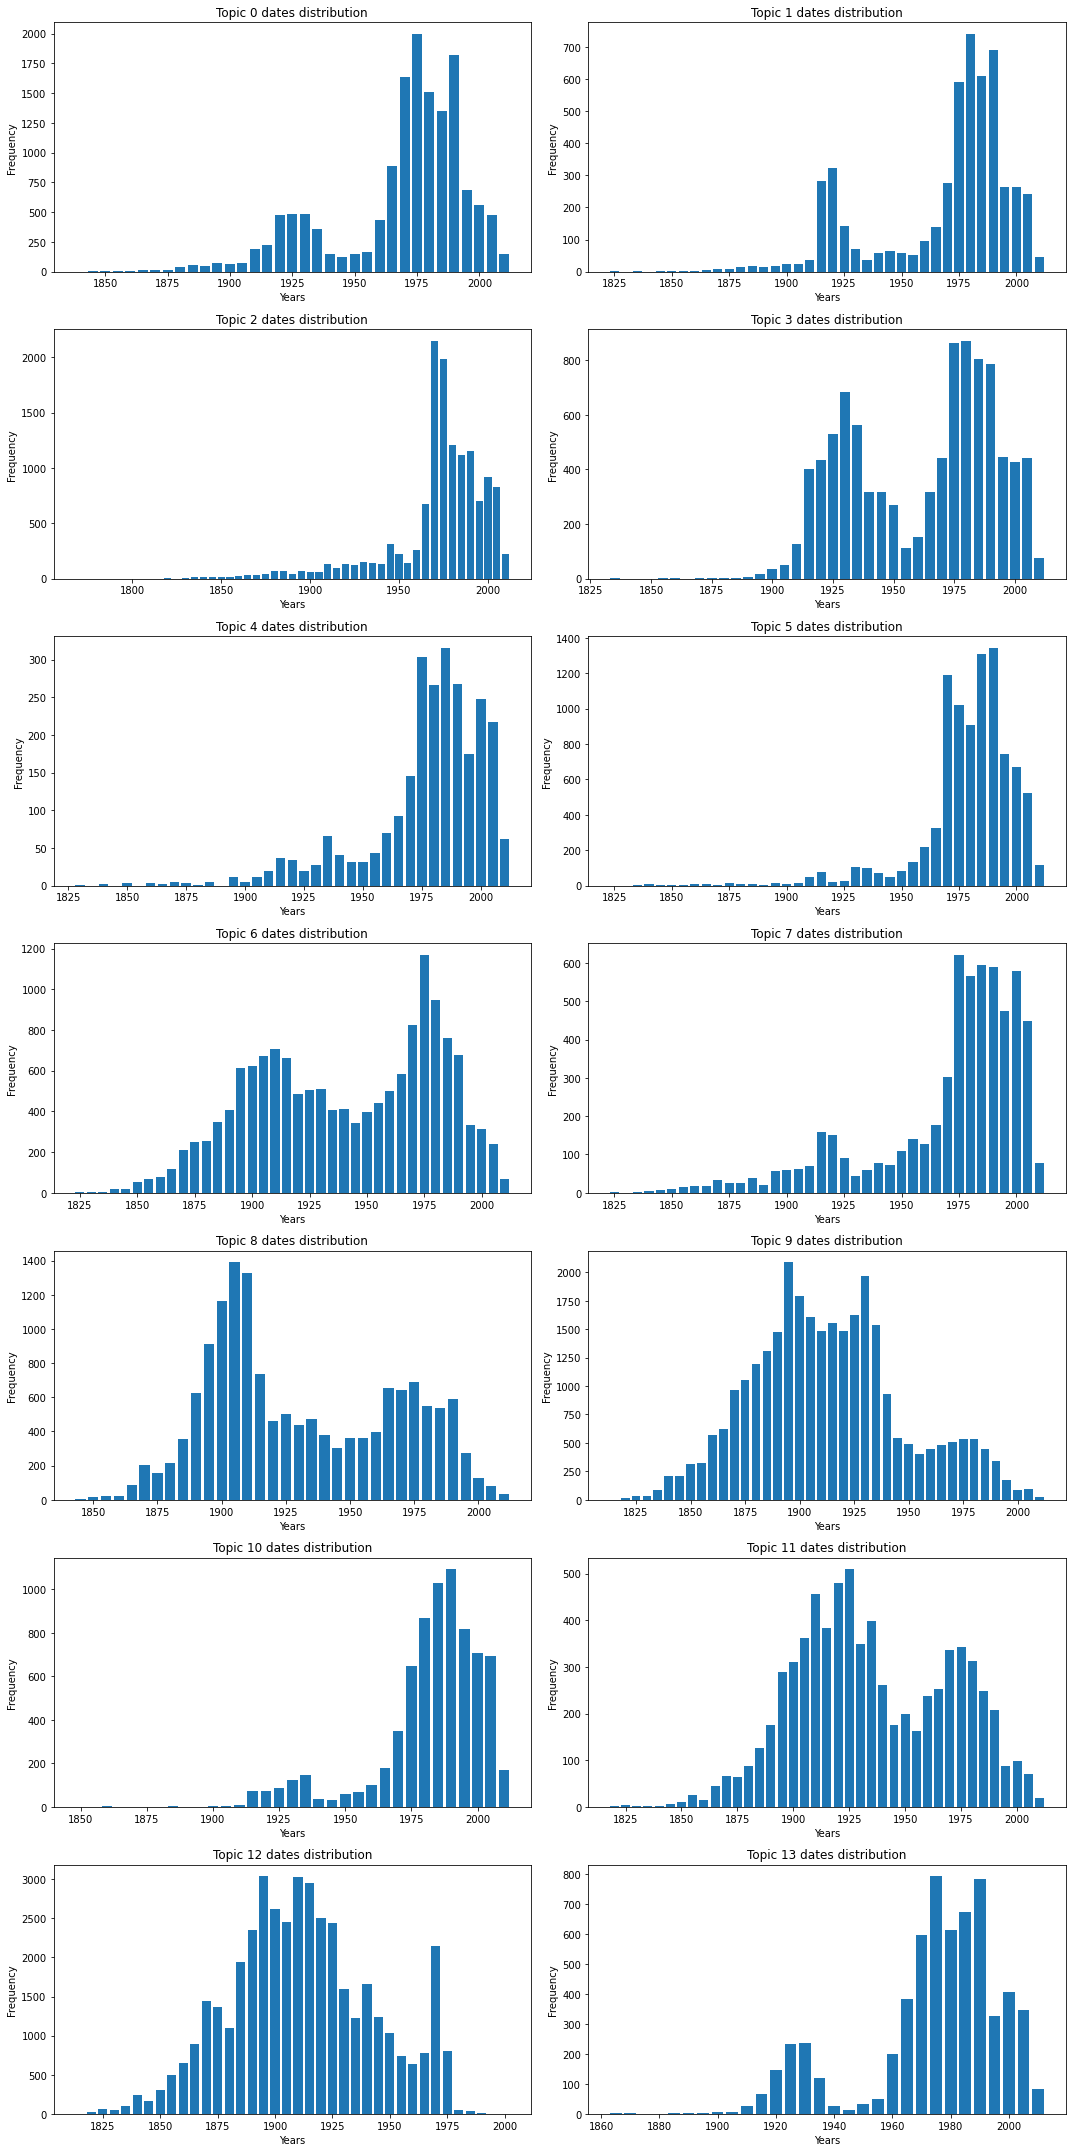

In [10]:
interval = 5

fig, axs = plt.subplots(7,2, figsize=(15,30))

for i in range(14):
    f = defaultdict(lambda:0)
    for date in dists[i]:
        f[date - date%interval] += 1
    x = f.keys()
    y = f.values()
    axs[i//2][i%2].bar(x, y, width = 4)
    axs[i//2][i%2].set(title=f"Topic {i} dates distribution", xlabel="Years", ylabel="Frequency")

plt.tight_layout()
plt.savefig("../data/images/topics_year_distribution.jpeg", dpi=300)
plt.show()